# Introduction to Machine Learning
### Andreas Muller and Sarah Guido (2017) O'Reilly
## Ch. 2 Supervised Learning

# Linear Models for Classification
* Decision boundary is a linear function of the input
* Binary linear classifier separates two classes using a line, plane, or hyperplane

### Algorithms for Learning Linear Models differ in following two ways:
* Way they measure how well a particular combination of coefficients and intercepts fits training data
* If and what kind of regularization is used

## Logistic Regression
* Implemented in `linear_model.logisticRegression`

## Linear Support Vector Machines (linear SVMs)
* Implemented in `svm.LinearSVC`

### Import packages
* Load forge dataset and assign variables

In [1]:
import sklearn
import mglearn

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC

In [3]:
X, y = mglearn.datasets.make_forge()

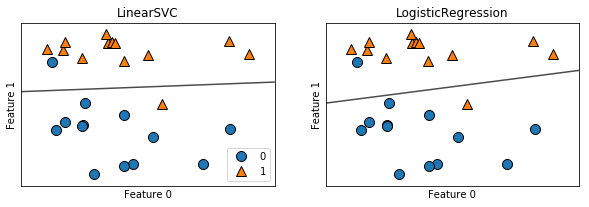

In [10]:
fig, axes = plt.subplots(1, 2, figsize=(10,3))

for model, ax in zip([LinearSVC(), LogisticRegression()], axes):
    clf = model.fit(X, y)
    mglearn.plots.plot_2d_separator(clf, X, fill=False, eps=0.5,
                                   ax=ax, alpha=0.7)
    mglearn.discrete_scatter(X[:,0], X[:,1], y, ax=ax)
    ax.set_title("{}".format(clf.__class__.__name__))
    ax.set_xlabel("Feature 0")
    ax.set_ylabel("Feature 1")
axes[0].legend(loc=4)

### Figure 1. Decision boundaries of linear SVM and logistic regresison on forge data with default parameters
* Any new data point above decision boundary classified as 1, any points below classified as 2
* Both models apply L2 regularization by default, same way as Ridge regression
* Foth both models C is tradeoff parameter that determines the strength of regularization

## Regularization Parameter C
#### High values of C: 
* Correspond to less regularization, models will fit training set as best as possible
* Stresses importance of each individual data point to be classified correctly

#### Low values of C: 
* Models put more emphasis on finding coefficient vector (w) close to zero
* Cause models to try to adjust to the 'majority' of data points

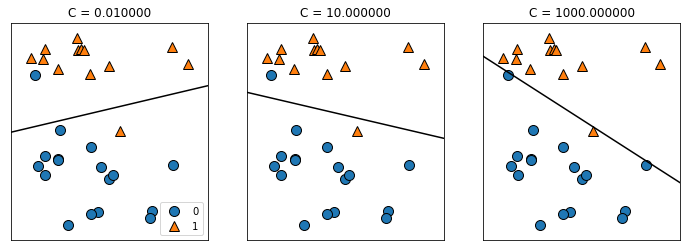

In [11]:
mglearn.plots.plot_linear_svc_regularization()

### Figure 2. 
* Left panel: Small values of C gives lots of regularization, two misclassified points
* Middle panel: Moderate C, model focuses on misclassified points, tilts decision boundary 
#### (Right panel) for High C:
    * Model tries to correctly classify all points correctly with a straight line
    * But may not capture overall layout of classes well. Model is likely OVERFITTING! 
    * Decision bounday is titled a lot; all points in class 0 are correctly classified.

## Linear Models of Classification
### Low Dimensional spaces
* Linear model for classification may seems restrictive in low-dimensional space
* Only allowing for decision boundaries that are straight lines or planes

### High Dimensional spaces
* Linear models for classification become very powerful
* Guarding against OVERFITTING becomes important when considering many features

## Example: WI Breast Cancer Study
* Load WI Breast Cancer study data
* Show features
* Visualize dataset

In [19]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()

In [20]:
print(cancer.keys())

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names'])


In [21]:
print(cancer['target_names'])

['malignant' 'benign']


In [22]:
print(cancer['feature_names'])

['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']


In [25]:
type(cancer)

sklearn.datasets.base.Bunch

In [26]:
cancer.data.shape

(569, 30)

In [28]:
cancer_df = pd.DataFrame(X_train, columns=cancer.feature_names)
cancer_df.head()


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,19.89,20.26,130.50,1214.0,0.10370,0.13100,0.1411,0.09431,0.1802,0.06188,...,23.73,25.23,160.5,1646.0,0.14170,0.3309,0.4185,0.16130,0.2549,0.09136
1,12.89,13.12,81.89,515.9,0.06955,0.03729,0.0226,0.01171,0.1337,0.05581,...,13.62,15.54,87.4,577.0,0.09616,0.1147,0.1186,0.05366,0.2309,0.06915
2,17.14,16.40,116.00,912.7,0.11860,0.22760,0.2229,0.14010,0.3040,0.07413,...,22.25,21.40,152.4,1461.0,0.15450,0.3949,0.3853,0.25500,0.4066,0.10590
3,17.30,17.08,113.00,928.2,0.10080,0.10410,0.1266,0.08353,0.1813,0.05613,...,19.85,25.09,130.9,1222.0,0.14160,0.2405,0.3378,0.18570,0.3138,0.08113
4,22.01,21.90,147.20,1482.0,0.10630,0.19540,0.2448,0.15010,0.1824,0.06140,...,27.66,25.80,195.0,2227.0,0.12940,0.3885,0.4756,0.24320,0.2741,0.08574


## Logistic Regression: Cancer Data
* Split data into TRAIN and TEST sets
* Fit the model on Training data
* Evaluate model on Text data

In [16]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, stratify=cancer.target, random_state=42)

In [17]:
logreg = LogisticRegression().fit(X_train, y_train)

In [18]:
print("Training set score: {:.3f}".format(logreg.score(X_train, y_train)))
print("Test set score: {:.3f}".format(logreg.score(X_test, y_test)))

Training set score: 0.953
Test set score: 0.958


### Regularization Parameter settings 
* Default setting `C=1` provides good performance for train and test sets
* Very likely UNDERFITTING 

### Use higher value of C to fit more 'flexible' model
* C=100 gives higher training set accuracy and slightly higher Test set accuracy
* More complex model (flexible) performs better

In [31]:
logreg100 = LogisticRegression(C=100).fit(X_train, y_train)
print("Training set score: {:.3f}".format(logreg100.score(X_train, y_train)))
print("Test set score: {:.3f}".format(logreg100.score(X_test, y_test)))

Training set score: 0.967
Test set score: 0.965


### Use lower value of C to fit more 'regularized' model
* Setting C=0.01 leads model to try to adjust to 'majority' of data points
* Decreased model accuracy for both training and Test sets

In [32]:
logreg001 = LogisticRegression(C=0.01).fit(X_train, y_train)
print("Training set score: {:.3f}".format(logreg001.score(X_train, y_train)))
print("Test set score: {:.3f}".format(logreg001.score(X_test, y_test)))

Training set score: 0.934
Test set score: 0.930


## Plot Coefficients of Logistic Regression for different values of C
* By default `LogisticRegression` applies L2 regularization similar to `Ridge` regression
* Stronger regularization pushes coefficients closer to zero
* Parameter values can influence values of Coefficients

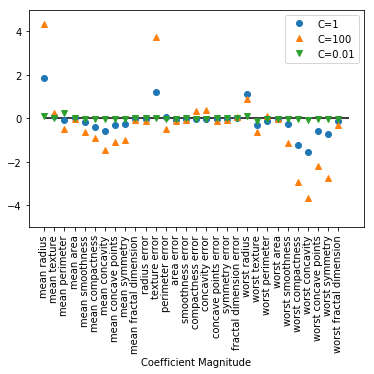

In [35]:
plt.plot(logreg.coef_.T, 'o', label="C=1")
plt.plot(logreg100.coef_.T, '^', label="C=100")
plt.plot(logreg001.coef_.T, 'v', label="C=0.01")

plt.xticks(range(cancer.data.shape[1]), cancer.feature_names, rotation=90)
plt.hlines(0,0, cancer.data.shape[1])
plt.ylim(-5, 5)

plt.xlabel("Coefficient Index")
plt.xlabel("Coefficient Magnitude")
plt.legend()

## Creating More Interpretable Model: L1 Regularization (Lasso)
* `L1` regularization (Lasso) limits values of most coefficients to zero
*  Model is limited to using only a few features

Training accuracy of L1 logreg with C=0.010: 0.92
Test accuracy of L1 logreg with C=0.010: 0.93
Training accuracy of L1 logreg with C=1.000: 0.96
Test accuracy of L1 logreg with C=1.000: 0.96
Training accuracy of L1 logreg with C=100.000: 0.99
Test accuracy of L1 logreg with C=100.000: 0.98


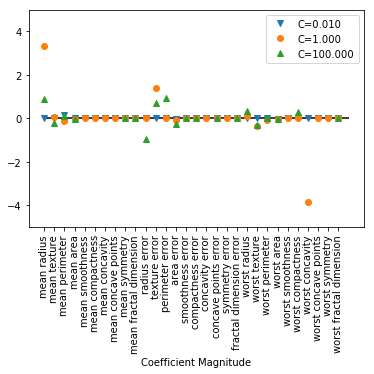

In [37]:
for C, marker in zip([0.01, 1, 100], ['v', 'o', '^']):
    lr_l1 = LogisticRegression(C=C, penalty="l1").fit(X_train, y_train)
    print("Training accuracy of L1 logreg with C={:.3f}: {:.2f}".format(
        C, lr_l1.score(X_train, y_train)))
    print("Test accuracy of L1 logreg with C={:.3f}: {:.2f}".format(
        C, lr_l1.score(X_test, y_test)))
    plt.plot(lr_l1.coef_.T, marker, label="C={:.3f}".format(C))
    
plt.xticks(range(cancer.data.shape[1]), cancer.feature_names, rotation=90)
plt.hlines(0,0, cancer.data.shape[1])
plt.xlabel("Coefficient Index")
plt.xlabel("Coefficient Magnitude")

plt.ylim(-5, 5)
plt.legend()

## Penalty Parameter (L) and Linear Classification Models
* Main difference between linear models for classification is penalty parameter
* L2 (Ridge) penalty uses all available features, regularization C pushes toward zero 
* L2 (Lasso) penalty sets coefficients for most features to zero, uses only a subset
    * Improved interpretability with L2 penalty (Lasso)